
Menu:
1. Bitcoin
2. Ethereum
3. Ripple
4. Correlation Matrix
5. BarChart
6. Exit
Enter your choice (1-6): 1

Fetching Bitcoin data...
   timestamp     open     high      low    close     vwap         volume  \
0 2022-07-11  20830.3  20847.4  19870.5  19947.0  20385.5  3526.05246794   
1 2022-07-12  19943.3  20036.3  19214.1  19307.9  19641.7  3986.29656040   
2 2022-07-13  19305.8  20332.3  18900.0  20233.6  19540.6  5490.05018666   
3 2022-07-14  20222.3  20894.5  19609.4  20573.7  20235.5  4241.84682873   
4 2022-07-15  20575.3  21178.0  20375.3  20825.3  20814.5  3351.28551265   

   count  
0  26945  
1  25331  
2  32967  
3  23916  
4  22188  

Bitcoin Data:
No Missing Values:
timestamp    0
open         0
high         0
low          0
close        0
vwap         0
volume       0
count        0
dtype: int64
Analysis:
Mean Of The Logarithmic returns:  0.0015527107817591259
Median Of The Logarithmic returns:  -0.0003512154846376968
Standard Deviation Of The Logarithmic returns:  0.

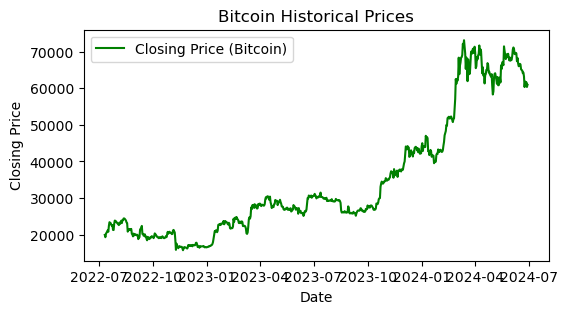

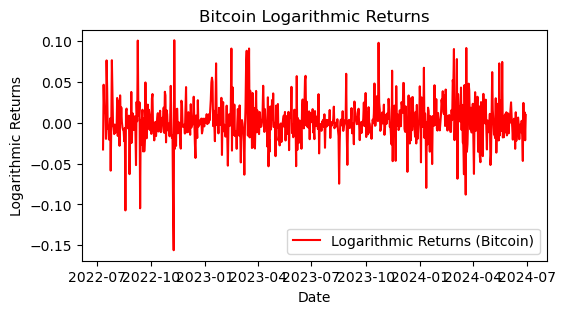


Menu:
1. Bitcoin
2. Ethereum
3. Ripple
4. Correlation Matrix
5. BarChart
6. Exit
Enter your choice (1-6): 2

Fetching Ethereum data...
   timestamp     open     high      low    close     vwap          volume  \
0 2022-07-11  1167.57  1169.64  1091.45  1095.99  1132.36  37199.35896230   
1 2022-07-12  1095.78  1096.46  1033.17  1037.02  1067.75  38611.71455578   
2 2022-07-13  1037.31  1117.35  1006.03  1114.73  1060.52  66731.84631157   
3 2022-07-14  1114.22  1213.42  1071.38  1191.78  1137.33  67327.21115306   
4 2022-07-15  1191.78  1286.69  1180.37  1230.80  1226.63  90036.65371097   

   count  
0  19105  
1  17170  
2  28113  
3  35017  
4  29827  

Ethereum Data:
No Missing Values:
timestamp    0
open         0
high         0
low          0
close        0
vwap         0
volume       0
count        0
dtype: int64
Analysis:
Mean Of The Logarithmic returns:  0.0015707010928009254
Median Of The Logarithmic returns:  0.00018901415428633194
Standard Deviation Of The Logarithmic retu

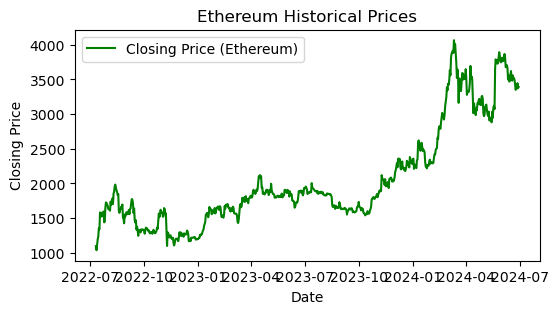

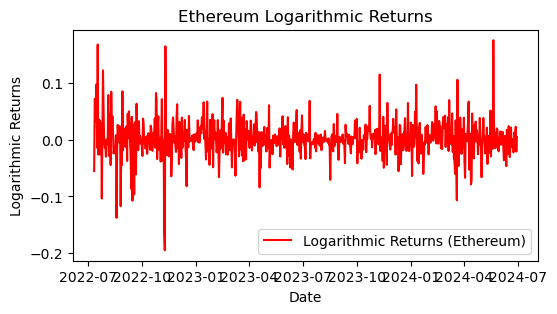


Menu:
1. Bitcoin
2. Ethereum
3. Ripple
4. Correlation Matrix
5. BarChart
6. Exit
Enter your choice (1-6): 3

Fetching Ripple data...
   timestamp     open     high      low    close     vwap             volume  \
0 2022-07-11  0.32438  0.32840  0.31000  0.31496  0.32341  11784351.79500285   
1 2022-07-12  0.31443  0.31750  0.30770  0.31122  0.31255   3981258.56541894   
2 2022-07-13  0.31119  0.32577  0.30265  0.32379  0.31344   8665041.65897146   
3 2022-07-14  0.32452  0.33365  0.31241  0.33329  0.32017   4325086.06059874   
4 2022-07-15  0.33336  0.34832  0.32746  0.33411  0.33649  10496441.75466419   

   count  
0   2449  
1   1770  
2   2787  
3   1617  
4   2148  

Ripple Data:
No Missing Values:
timestamp    0
open         0
high         0
low          0
close        0
vwap         0
volume       0
count        0
dtype: int64
Analysis:
Mean Of The Logarithmic returns:  0.0005735226401030667
Median Of The Logarithmic returns:  -7.921105790520564e-05
Standard Deviation Of The Lo

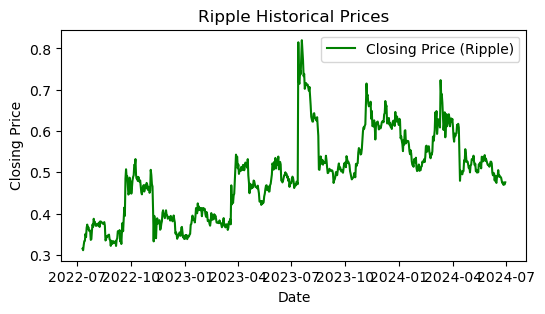

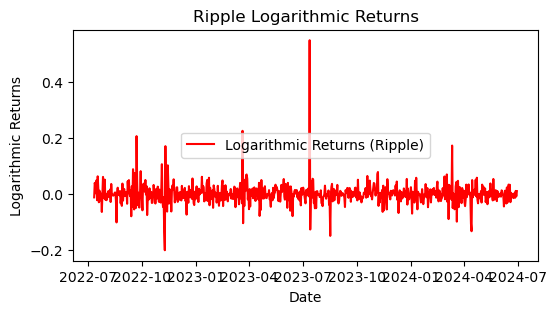


Menu:
1. Bitcoin
2. Ethereum
3. Ripple
4. Correlation Matrix
5. BarChart
6. Exit
Enter your choice (1-6): 4

Correlation Matrix between Bitcoin, Ethereum, and Ripple Returns:


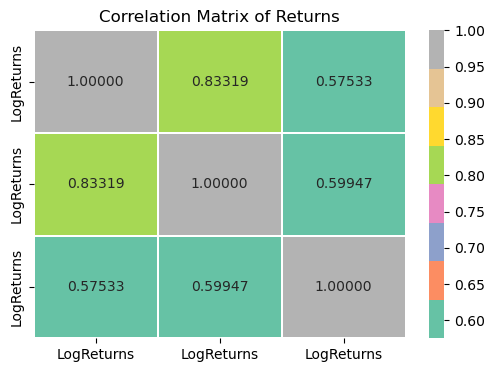

            LogReturns  LogReturns  LogReturns
LogReturns    1.000000    0.833188    0.575329
LogReturns    0.833188    1.000000    0.599472
LogReturns    0.575329    0.599472    1.000000

Menu:
1. Bitcoin
2. Ethereum
3. Ripple
4. Correlation Matrix
5. BarChart
6. Exit
Enter your choice (1-6): 5


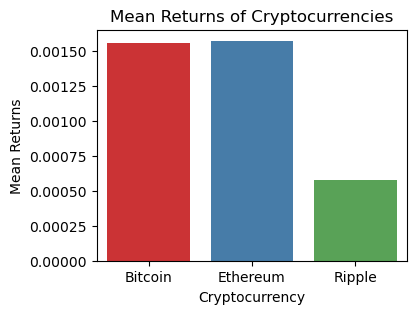

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

class CryptoData:
    def __init__(self):
        self.df_bitcoin = None
        self.df_ethereum = None
        self.df_ripple = None
    
    def dataScrap(self, pair):
        url = f'https://api.kraken.com/0/public/OHLC?pair={pair}&interval=1440'
        data = requests.get(url).json()
        ohlc_data = data['result'][pair]
        df = pd.DataFrame(ohlc_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s') 
        df.to_csv(f'{pair}_data.csv', index=True)
        return df

    def dataScrapBitcoin(self):
        self.df_bitcoin = self.dataScrap('XXBTZUSD')
        return self.df_bitcoin.head()

    def dataScrapEthereum(self):
        self.df_ethereum = self.dataScrap('XETHZUSD')
        return self.df_ethereum.head()

    def dataScrapRipple(self):
        self.df_ripple = self.dataScrap('XXRPZUSD')
        return self.df_ripple.head()

    def MissingValues(self, df):
        missing_values = df.isnull().sum()
        return missing_values

    def LogReturns(self, df):
        df['close'] = pd.to_numeric(df['close'])
        df['LogReturns'] = np.log(df['close'] / df['close'].shift(1))
        return df['LogReturns']

    def Analysis(self, df):
        returns = self.LogReturns(df)
        mean = returns.mean()
        print('Mean Of The Logarithmic returns: ', mean)
        median = returns.median()
        print('Median Of The Logarithmic returns: ', median)
        std = returns.std()
        print('Standard Deviation Of The Logarithmic returns: ', std)

    def MaxReturnDate(self, df):
        returns = self.LogReturns(df)
        maxReturnDate = df.loc[returns.idxmax(),'timestamp']
        return maxReturnDate
    
    def PlotHistoricalPrices(self, df, label):
        plt.figure(figsize=(6, 3))
        plt.plot(df['timestamp'], df['close'], label=f'Closing Price ({label})',color='green')
        plt.title(f'{label} Historical Prices')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.show()
        
    def PlotLogReturns(self, df, label):
        plt.figure(figsize=(6, 3))
        plt.plot(df['timestamp'], df['LogReturns'], label=f'Logarithmic Returns ({label})',color='red')
        plt.title(f'{label} Logarithmic Returns')
        plt.xlabel('Date')
        plt.ylabel('Logarithmic Returns')
        plt.legend()
        plt.show()

    def CorrelationMatrix(self):
        returns_bitcoin = self.LogReturns(self.df_bitcoin)
        returns_ethereum = self.LogReturns(self.df_ethereum)
        returns_ripple = self.LogReturns(self.df_ripple)
        correlation_matrix = pd.concat([returns_bitcoin, returns_ethereum, returns_ripple], axis=1).corr()
        plt.figure(figsize=(6, 4))
        sns.heatmap(correlation_matrix, annot=True, cmap='Set2', fmt=".5f", linewidths=.1)
        plt.title('Correlation Matrix of Returns')
        plt.show()
        return correlation_matrix
    
    def MeanReturnsBarChart(self):
        returns_bitcoin = self.LogReturns(self.df_bitcoin)
        returns_ethereum = self.LogReturns(self.df_ethereum)
        returns_ripple = self.LogReturns(self.df_ripple)
        mean_returns = [returns_bitcoin.mean(), returns_ethereum.mean(), returns_ripple.mean()]
        cryptocurrencies = ['Bitcoin', 'Ethereum', 'Ripple']
        plt.figure(figsize=(4, 3))
        sns.barplot(x=cryptocurrencies, y=mean_returns, palette='Set1')
        plt.title('Mean Returns of Cryptocurrencies')
        plt.xlabel('Cryptocurrency')
        plt.ylabel('Mean Returns')
        plt.show()
        
    def DisplayInfo(self, df, label):
        print(f'\n{label} Data:')
        print('No Missing Values:')
        print(self.MissingValues(df))
        print('Analysis:')
        self.Analysis(df)
        print(f'Date with the highest return ({label}): ', self.MaxReturnDate(df))
        self.PlotHistoricalPrices(df, label)
        self.PlotLogReturns(df, label)

def main():
    crypto_data = CryptoData()

    while True:
        print("\nMenu:")
        print("1. Bitcoin")
        print("2. Ethereum")
        print("3. Ripple")
        print("4. Correlation Matrix")
        print("5. BarChart")
        print("6. Exit")

        choice = input("Enter your choice (1-6): ")

        if choice == '1':
            print('\nFetching Bitcoin data...')
            print(crypto_data.dataScrapBitcoin())
            crypto_data.DisplayInfo(crypto_data.df_bitcoin, 'Bitcoin')

        elif choice == '2':
            print('\nFetching Ethereum data...')
            print(crypto_data.dataScrapEthereum())
            crypto_data.DisplayInfo(crypto_data.df_ethereum, 'Ethereum')

        elif choice == '3':
            print('\nFetching Ripple data...')
            print(crypto_data.dataScrapRipple())
            crypto_data.DisplayInfo(crypto_data.df_ripple, 'Ripple')

        elif choice == '4':
            print('\nCorrelation Matrix between Bitcoin, Ethereum, and Ripple Returns:')
            print(crypto_data.CorrelationMatrix())

        elif choice == '5':
            crypto_data.MeanReturnsBarChart()
            break
            
        elif choice == '6':
            print("Exiting the program.")
            break

        else:
            print("Invalid choice. Please enter a number between 1 and 6.")

if __name__ == "__main__":
    main()
